# Cleaning Data Exercises

For the exercises, you will be cleaning data in your chosen data set. [Towards Data Science](https://towardsdatascience.com/data-cleaning-in-python-the-ultimate-guide-2020-c63b88bf0a0d) outlines the steps we should take to clean data using a different data set from Kaggle. While you should use this article as a reference, make sure not to copy paste as the two data sets are very different!

To start cleaning data, we first need to create a dataframe from the CSV and print out any relevant info to make sure our dataframe is ready to go.

In [5]:
# Import pandas and any other libraries you need here. HINT: Check out the article to see what they imported to get started!
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a new dataframe from your CSV
rats_df = pd.read_csv('Rat_Sightings.csv')

In [4]:
# Print out any information you need to understand your dataframe
rats_df.info(verbose=True)
rats_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101914 entries, 0 to 101913
Data columns (total 52 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      101914 non-null  int64  
 1   Created Date                    101914 non-null  object 
 2   Closed Date                     90983 non-null   object 
 3   Agency                          101914 non-null  object 
 4   Agency Name                     101914 non-null  object 
 5   Complaint Type                  101914 non-null  object 
 6   Descriptor                      101914 non-null  object 
 7   Location Type                   101908 non-null  object 
 8   Incident Zip                    101578 non-null  float64
 9   Incident Address                92840 non-null   object 
 10  Street Name                     92839 non-null   object 
 11  Cross Street 1                  85257 non-null   object 
 12  Cross Street 2  

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,31464015,09/04/2015 12:00:00 AM,09/18/2015 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Mixed Use Building,10006.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.707772,-74.012963,"(40.70777155363643, -74.01296309970473)"
1,31464024,09/04/2015 12:00:00 AM,10/28/2015 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,Commercial Building,10306.0,2270 HYLAN BOULEVARD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.575209,-74.104547,"(40.575209242947444, -74.1045465185469)"
2,31464025,09/04/2015 12:00:00 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,1-2 Family Dwelling,10310.0,758 POST AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.631236,-74.126878,"(40.63123555151668, -74.12687759748677)"
3,31464026,09/04/2015 12:00:00 AM,09/14/2015 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Apt. Building,11206.0,198 SCHOLES STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.708987,-73.941207,"(40.70898692345805, -73.94120690238431)"
4,31464027,09/04/2015 12:00:00 AM,09/22/2015 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Mixed Use Building,10462.0,2138 WALLACE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.854130,-73.864813,"(40.85413014360452, -73.86481331044513)"


Now you have a dataframe set up, you are ready to dive in and start cleaning!

## Missing Data

In the Towards Data Science article, they list 3 techniques for detecting any missing data frame. Try all three before deciding on a way to solve any missing data issues.

<AxesSubplot:>

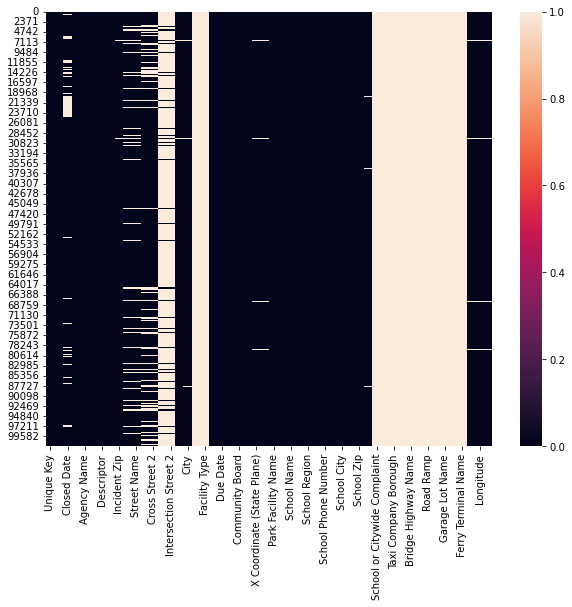

In [7]:
# Plot a heatmap of any missing data
plt.figure(figsize=(10,8))

cols = rats_df.columns[:52]

sns.heatmap(rats_df[cols].isna())

In [9]:
# Try out a missing data percentage list! 
pct_missing = rats_df.isna().mean()
pct_missing

Unique Key                        0.000000
Created Date                      0.000000
Closed Date                       0.107257
Agency                            0.000000
Agency Name                       0.000000
Complaint Type                    0.000000
Descriptor                        0.000000
Location Type                     0.000059
Incident Zip                      0.003297
Incident Address                  0.089036
Street Name                       0.089046
Cross Street 1                    0.163442
Cross Street 2                    0.163766
Intersection Street 1             0.912426
Intersection Street 2             0.912426
Address Type                      0.003395
City                              0.003356
Landmark                          0.999657
Facility Type                     1.000000
Status                            0.000000
Due Date                          0.001148
Resolution Action Updated Date    0.000029
Community Board                   0.000000
Borough    

<AxesSubplot:>

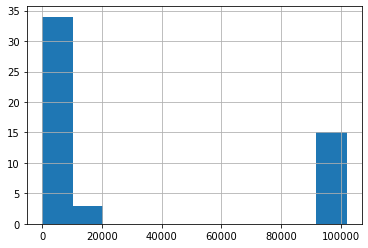

In [11]:
# Plot a missing data histogram
missing_data = rats_df.isna().sum()
missing_data.hist()

Now that you have tried all 3 techniques for detecting missing data, did you find any? Reading through the article, which solution do you think will help you clean the data set and handle the missing data? Try out your solution below!

In [12]:
# Handle any missing data in your dataframe.
df_less_missing_cols = rats_df.loc[:, pct_missing <= .5].copy()
df_less_missing_cols.shape

(101914, 37)

## Irregular Data

With missing data out of the way, turn your attention to any outliers. Just as we did for missing data, we first need to detect the outliers. The article outlines the top techniques for finding outliers in a dataset.

<AxesSubplot:>

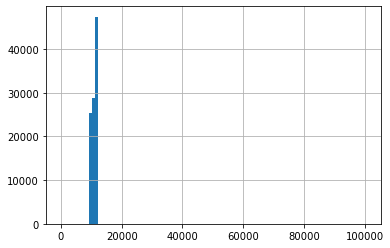

In [24]:
# Plot a histogram to see if there are any outliers.

rats_df.kurt(numeric_only=True)[:10]
rats_df['Incident Zip'].hist(bins=100)

In [25]:
# Use the describe() method
rats_df['Incident Zip'].describe

<bound method NDFrame.describe of 0         10006.0
1         10306.0
2         10310.0
3         11206.0
4         10462.0
           ...   
101909    11207.0
101910    11233.0
101911    11213.0
101912    11105.0
101913    11238.0
Name: Incident Zip, Length: 101914, dtype: float64>

<AxesSubplot:>

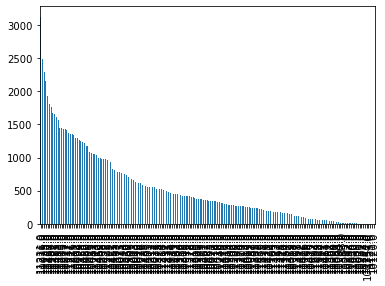

In [26]:
# Plot a bar chart
rats_df['Incident Zip'].value_counts().plot(kind='bar')

Which of the three techniques helped you find any outliers? Now that you have found outliers, what will you do to solve the problem?

In [10]:
# Handle any outliers in your dataframe
#The Histogram shows possible outliers

## Unnecessary Data

Unnecessary data could be duplicates, irrelevant, or any uninformative data. Dive into each type of unnecessary data to see if there is any in the data set. Make sure to make note of how you would handle each type of unnecessary data.

In [11]:
# Look for any irrelevant data in the dataframe. How will you handle it?
# There are quite a few columns that have zero data and are not helpful. They can be deleted.

In [30]:
# Look for duplicates. How will you handle any duplicates?
# I would remove them and save the new dataset as rats_df_dedupped

In [ ]:
# Think about what data in the dataframe may be uninformative. Make note here of what situations may render data uninformative and how you would handle it?
# Vehicle type may not be relevant to rodent sightings and could be removed.

## Inconsistent Data

Inconsistent data is anything that messes with your model. This is likely due to inconsistent formatting and can be addressed by re-formatting all values in a column or row.

In [31]:
# Try to convert all the strings in a column to lower or upper case. 
rats_df['Intersection Street 1'].value_counts(dropna=False)

NaN                 92989
BROADWAY              246
2 AVENUE              167
AMSTERDAM AVENUE      111
LEXINGTON AVENUE      105
                    ...  
HOE AVENUE              1
CLAFLIN AVENUE          1
CHERRY AVENUE           1
BURKE AVE               1
EMERALD STREET          1
Name: Intersection Street 1, Length: 2437, dtype: int64